In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter, defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

nltk.download('stopwords')
stop=set(stopwords.words('english'))


from sklearn.feature_extraction.text import CountVectorizer

import os
import re
import string

import emoji
from tqdm import tqdm

plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itsc0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading the data and getting basic idea 

In [2]:
dataset = pd.read_csv('../data/raw/com-medium-reader_20220101-19-42.csv')

In [3]:
print('There are {} rows and {} columns in dataset'.format(dataset.shape[0],dataset.shape[1]))

There are 40130 rows and 10 columns in dataset


reviewId                    0
userName                    0
userImage                   0
content                     1
score                       0
thumbsUpCount               0
reviewCreatedVersion     4533
at                          0
replyContent            37660
repliedAt               37660
dtype: int64

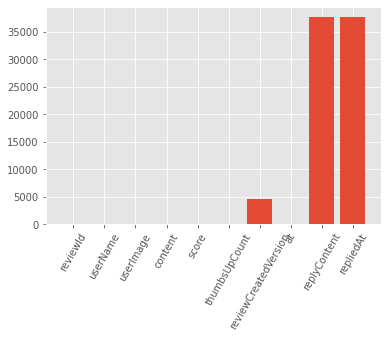

In [4]:
nans = dataset.isna().sum()
nans_x = nans.index.to_list()
nans_y = nans.values
plt.bar(nans_x, nans_y)
plt.xticks(rotation=60)
display(nans)

## Exploratory Data Analysis

Simple character, word and sentence level analysis

### Number of characters

In [5]:
dataset = dataset.dropna(subset=['content'])
dataset

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFcW5f5I3h5-Lx92iA1XvA3P7HSjXnBV6UL91R...,Charles Dickenson,https://play-lh.googleusercontent.com/a/AATXAJ...,"Just an echo chamber for anti-white, anti-fina...",1,0,NaN,2022-01-01 18:34:14,NaN,NaN
1,gp:AOqpTOHa_pylynpzR1s3aO8OXPusVFNXY968OS6QYXO...,Aanchal S,https://play-lh.googleusercontent.com/a-/AOh14...,Clear and easy to read!,4,0,4.5.1119137,2022-01-01 08:10:18,NaN,NaN
2,gp:AOqpTOHSGxkPIpm4M48XF_WUElOXPT9LsBeo38NCZ8B...,Maksym Dybarskyi,https://play-lh.googleusercontent.com/a-/AOh14...,Really? I have to pay on order to be able to r...,1,0,4.5.1119137,2021-12-31 13:16:07,NaN,NaN
3,gp:AOqpTOE5QEUpjX5Pr4hKmOnKau1zEl43bhbZsnxvi8o...,End Sorrow,https://play-lh.googleusercontent.com/a-/AOh14...,This is not good right now. Best of luck for t...,1,0,4.5.1119137,2021-12-31 11:39:08,NaN,NaN
4,gp:AOqpTOEsyG4h3fIm-Erf8-E818WnkfcWNSZrbrlhhMM...,Abhimanyu N,https://play-lh.googleusercontent.com/a-/AOh14...,"An option to always open the app in ""Recently ...",4,0,4.5.1119137,2021-12-31 06:01:50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
40125,gp:AOqpTOF9C-WAYjiMVUU1AesR2zExoAVEBuCLcFQbN4U...,Jason Jurotich,https://play-lh.googleusercontent.com/a-/AOh14...,The developers are working hard at offering th...,4,0,1.0,2015-06-24 20:34:15,NaN,NaN
40126,gp:AOqpTOHzKUANwHT28HeatEoYsv5YWdogfjkAWr0LD1q...,Alex Goot,https://play-lh.googleusercontent.com/a/AATXAJ...,Best writing experience on the web. Great netw...,5,9,1.0,2015-06-24 19:56:34,NaN,NaN
40127,gp:AOqpTOFTGy1Nyxil-e-gSiBGBhk6Z6nfVCH8HOfTpID...,Joy Chen,https://play-lh.googleusercontent.com/a-/AOh14...,"Finally, yes!!!!",5,3,NaN,2015-06-24 19:54:05,NaN,NaN
40128,gp:AOqpTOHMtOQUwIuewwQXtYQ9n_Wiicnbu6X8RNgFyyI...,Dan Benson,https://play-lh.googleusercontent.com/a/AATXAJ...,Loving it on my nexus6,5,2,1.0,2015-06-24 19:24:15,NaN,NaN


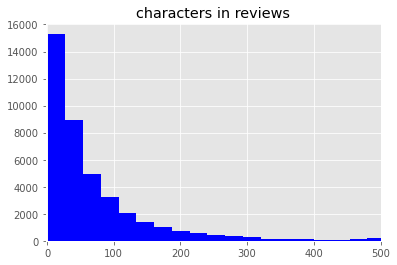

In [6]:
review_len=dataset['content'].str.len()
plt.hist(review_len,color='blue', bins=100)
plt.xlim(-2, 500)
plt.title('characters in reviews')
plt.show()

The distribution of character lengths is right skewed, most of the reviews are pretty short.

### Number of words in a review

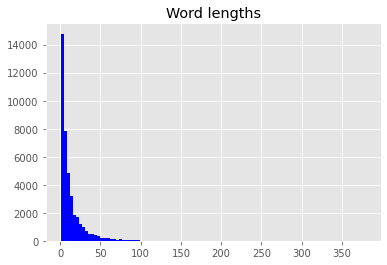

In [7]:
review_len=dataset['content'].str.split().map(lambda x: len(x))
plt.hist(review_len,color='blue', bins=100)
plt.title('Word lengths')
plt.show()


###  Average word length in a review

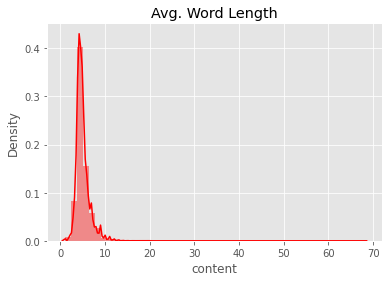

In [8]:
word = dataset['content'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),color='red')
plt.title('Avg. Word Length')
plt.show()

In [9]:
def create_corpus():
    corpus = []
    for x in dataset['content'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


corpus = create_corpus()

### Common stopwords

<BarContainer object of 10 artists>

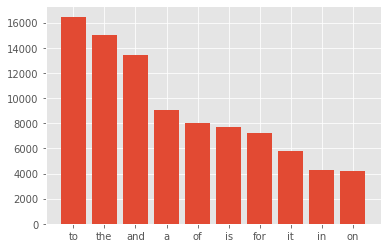

In [10]:
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
x, y = zip(*top)
plt.bar(x, y)


"to" dominates which is followed by "the" in dataset. This kind of detail may be useful if we decide to throughly process the dataset.

### Analyzing punctuations

<BarContainer object of 26 artists>

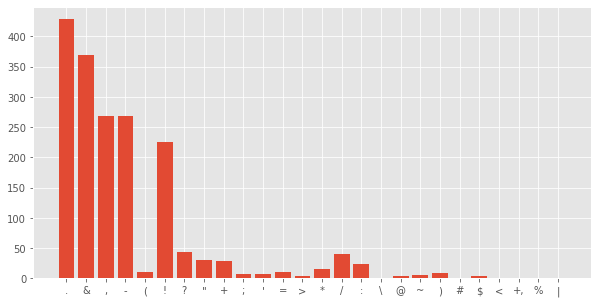

In [11]:
plt.figure(figsize=(10,5))

dic = defaultdict(int)
punc = string.punctuation
for i in corpus:
    if i in punc:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y)

### Common words ?

In [12]:
counter=Counter(corpus)
most=counter.most_common()
x = []
y = []
for word,count in most[:100]:
    if word not in stop:
        x.append(word)
        y.append(count)

<AxesSubplot:>

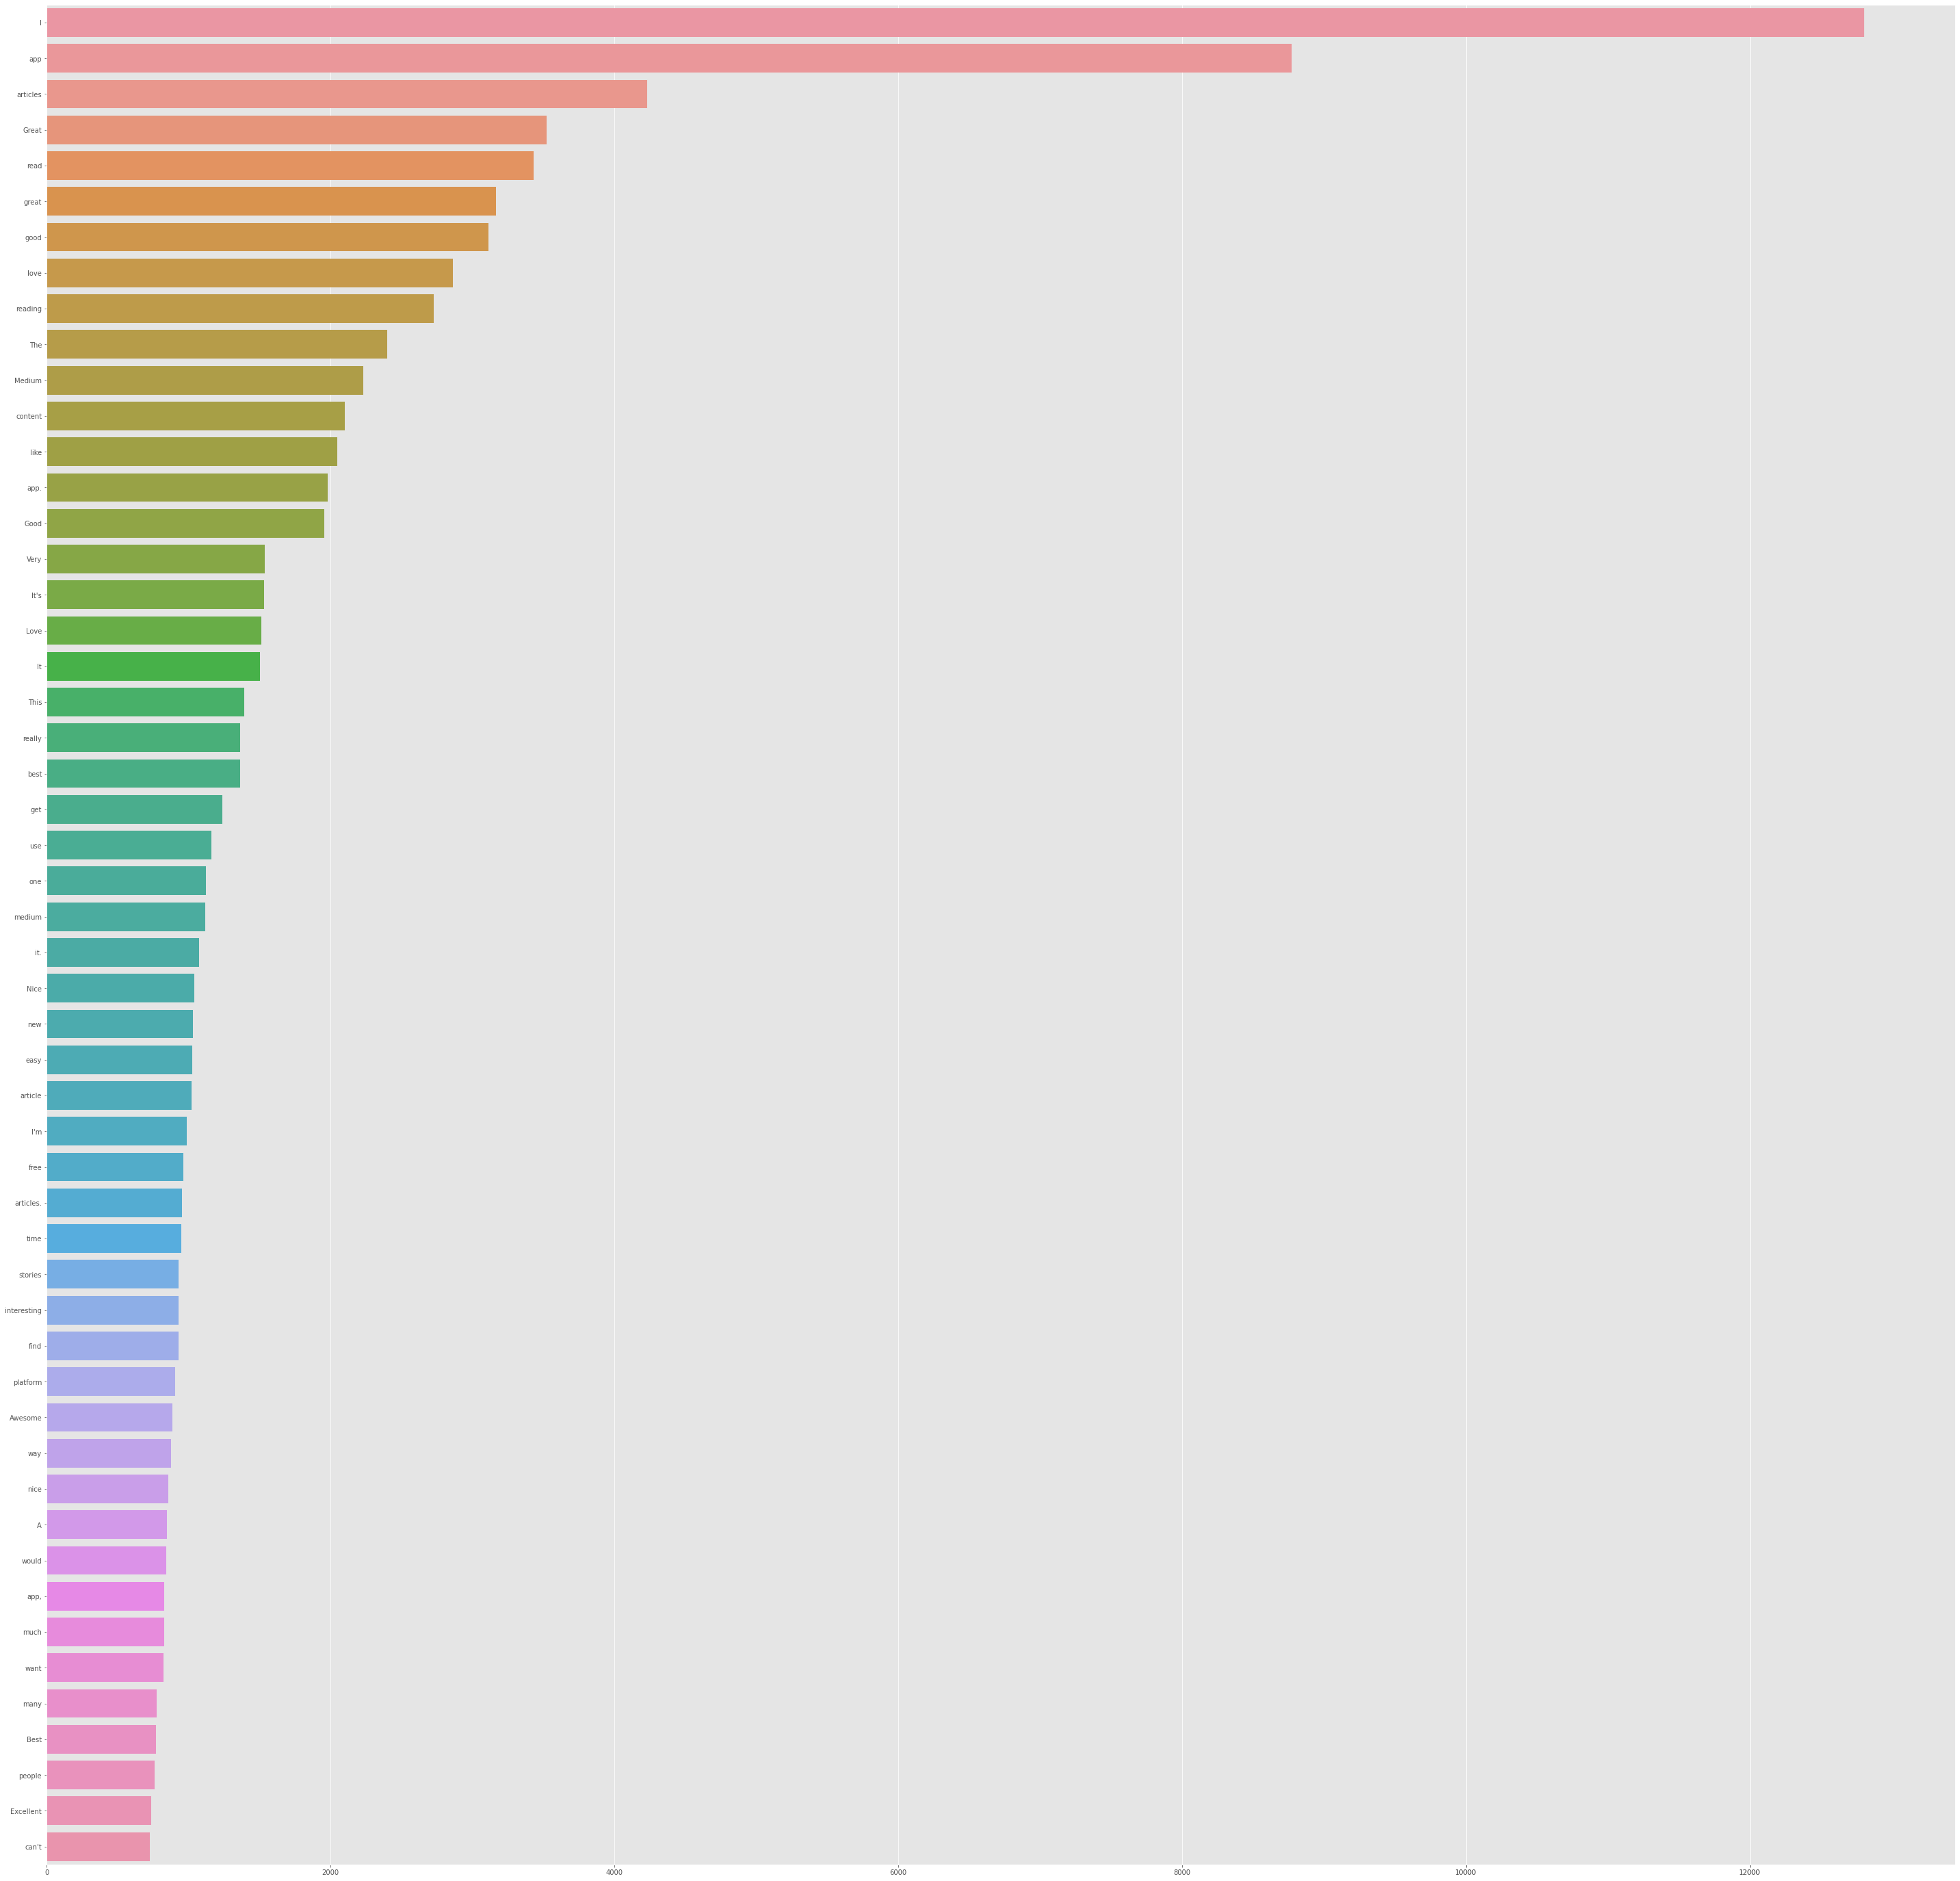

In [13]:
plt.figure(figsize=(50,50))
sns.barplot(x=y,y=x)

### N-gram analysis

We'll do a bigram (2-gram) analysis over the dataset

In [14]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

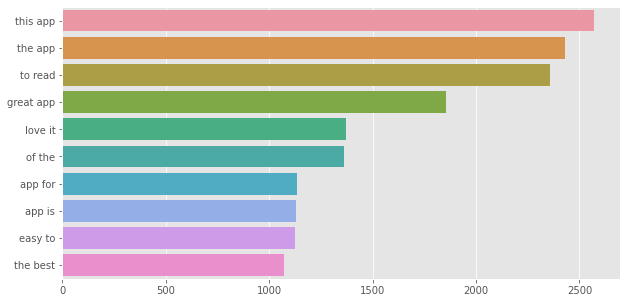

In [15]:
plt.figure(figsize=(10,5))
top_bigrams=get_top_bigrams(dataset['content'])[:10]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x)

we will need a lot of data cleaning for non-DL methods to work well. But we can still use contextual models like BERT to solve our tasks! 

## Data Cleaning
Casual text contents like these are generally needed to be cleaned before modeling. We could do some basic cleaning such as spelling correction, removing punctuations,  removing emojis etc. But, transformer models are contextual. Thus, spelling correction and removing emojis would suffice.

### Removing urls if any

In [16]:
example = "link:https://www.google.com"

In [17]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'link:'

In [18]:
df = dataset.copy(deep=True)

In [19]:
df['content']=df['content'].apply(lambda x: remove_URL(x))

### Removing HTML tags

In [20]:
example = """<div><p></p></div>"""

In [21]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))

In [22]:
df['content']=df['content'].apply(lambda x: remove_html(x))

### Removing Emojis
While some tokenizers supports emojis, some of them doesn't. So it depends to your model selection, we will remove the emojis from the dataset

In [23]:
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

def remove_emoji(text):
    return give_emoji_free_text(text)

remove_emoji("Disgusting app 😔😔")

'Disgusting app '

In [24]:
df['content']=df['content'].apply(lambda x: remove_emoji(x))

In [25]:
# let's map samples to lowercase
df['content'] = df['content'].apply(lambda s: s.lower())
df['content'].sample(10)

11061    i love writing, i hope with medium, i can shar...
13987     a pretty solid medium(pun intended) for writing.
3778                                           easy to use
6541                  nice app with wide range of subjects
22997                      nice blogging and learning site
12084             love the app... just wish it could count
25824                                              perfect
38223                      i love sharing my thoughts here
38445               i can always read what i want to read.
33182                                              good ui
Name: content, dtype: object

### Removing punctuations

We will stop here, it is not necessary to remove punctuations since they also store contextual information regarding to the review itself. So most of the models are also supports punctuations with their tokenizers

In [26]:
#def remove_punct(text):
#    table=str.maketrans('','',string.punctuation)
#    return text.translate(table)

#example="What?!"
#print(remove_punct(example))

In [27]:
#df['content']=df['content'].apply(lambda x : remove_punct(x))

### Spelling Correction
We won't apply any spelling correction, it is a pretty difficult task itself and prone to errors when performed exhausively and automatically. 

### Final NaN value check after processing

We removed few things from the reviews, we can encounter with an empty sample, let's check that!

In [28]:
len(df[df['content'] == ''])

185

so we have some empty samples, we can just remove them

In [29]:
empty_reviews = df[df['content'] == '']

df = df.drop(empty_reviews.index)

In [30]:
# finally we can export the data we processed :D
df.to_csv('../data/processed/lowercase_cleaned_dataset.csv', index=False)